<h3>To run cells, click into one and press <i>Run</i> up on the bar</h3>
<h4>A shortcut is Shift+Enter to run a cell/box</h4>
<h4>The Python interpreter will keep things in memory from cell to cell</h4>
<h4>The <i>Kernel</i> section is useful if you need to interrupt or restart for any reason</h4>

In [ ]:
# run this box if you don't already have these installed
#    or run these in command line

# you can also use command line to install these with 'conda install numpy' (for example) 
#    if using Anaconda
!pip install --upgrade pip
!pip install numpy
!pip install matplotlib

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import time

<h3>Implement the algorithms as described</h3>
<h4>You need to do the ### YOUR CODE HERE ### sections</h4>

In [24]:
# Use Greedy to find the minimum number of coins

# this changes coin counts into the actual coins
def get_result_greedy(coin_counts, coins):
    coins_used = []
    for i in range(len(coin_counts)):
        for j in range(coin_counts[i]):
            coins_used.append(coins[i])
    return coins_used

def change_greedy(coins, value):
    n = len(coins)
    
    # coin_counts is the counts of coins you are using
    # coin_counts[i] = count(coin[i])
    coin_counts = [0]*len(coins)
    
    # Implement the greedy version as described in pdf
    # Remember to add to coin_counts[i] for coins[i], when appropriate
    
    ######################
    ### YOUR CODE HERE ###
    ######################
    
    max_denomination = coins[-1]
    curr_element = n - 1

    while (value != 0):
        if (max_denomination > value):
            max_denomination = coins[curr_element - 1]
            curr_element -= 1
        else:
            coin_counts[curr_element] += 1
            value = value - max_denomination
    
    return coin_counts

In [25]:
# Test your greedy implementation
# It should pass assert statements

def test_greedy():
    coins = [1, 10, 25, 50] 
    value = 40
    coin_counts = change_greedy(coins, value)
    num_coins = sum(coin_counts)
    coins_used = get_result_greedy(coin_counts, coins)
    assert num_coins == 7, 'Wrong number of coins'
    assert coins_used == [1, 1, 1, 1, 1, 10, 25], 'Wrong coins used'
    assert sum(coins_used) == value, 'Incorrect change value'
    print('Value: {}, Number of coins: {}, Coins used: {}'.format(value, num_coins, coins_used))
test_greedy()

Value: 40, Number of coins: 7, Coins used: [1, 1, 1, 1, 1, 10, 25]


In [30]:
# Use Dynamic Programming to find the minimum number of coins

# ans is the coins you are using, returned by change_dp()
def get_result_dp(ans, value):
    count = value
    coins_used = []
    while count > 0:
        coins_used.append(ans[count])
        count = count - ans[count]
    return coins_used
    

# dynamic programming implementation
def change_dp(coins, value): 
    
    n = len(coins)
    
    # table[i] will be storing the minimum 
    #   number of coins required for value i 
    table = [0 for i in range(value + 1)]

    # ans[i] will be the coins array index of first coin
    #   you make change with at value i
    # we fill with -1 for non-existent values
    ans = [-1 for i in range(value + 1)]

    # Base case (If given value is 0)
    # Can't make change for 0 
    table[0] = 0
#     print(len(table[0]))
    # Initialize all table values as infinite
    for i in range(1, value + 1): 
        table[i] = sys.maxsize 
#     print(table)

    # Compute minimum coins required 
    # for all values i from 1 to value
    # Be sure to store the first coin you use at each i value

    ######################
    ### YOUR CODE HERE ###
    ###################### 
    for i in range(1, value + 1): 
        # Go through all coins smaller than i 
        for j in range(len(coins)): 
            if (coins[j] <= i): 
                sub_res = table[i - coins[j]] 
                if (sub_res != sys.maxsize and 
                    sub_res + 1 < table[i]): 
                    table[i] = sub_res + 1
                    ans[i] = coins[j]
                    
    # return minimum coins and the coins we used
    return table[value], ans

In [31]:
# Test your DP implementation
# It should pass assert statements
def test_dp():
    coins = [1, 10, 25, 50]  
    value = 40
    
    num_coins, ans = change_dp(coins, value)
    coin_usage = get_result_dp(ans, value)
    
    assert num_coins == 4, 'Wrong number of coins'
    assert coin_usage == [10, 10, 10, 10], 'Wrong coin types'
    assert sum(coin_usage) == value, 'Incorrect change value'
    
    print('Value: {}, Number of coins: {}, Coins used: {}'.format(value, len(coin_usage), coin_usage)) 

test_dp()

Value: 40, Number of coins: 4, Coins used: [10, 10, 10, 10]


<h3>Part 5 code for plots</h3>
<h4>You need to do the analysis in the report and explain what this represents</h4>

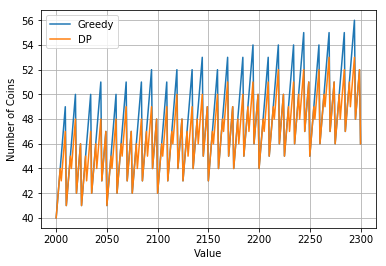

In [32]:
# part 5 plotting
# this should automatically work if your function is implemented

coins = [1, 10, 25, 50]
vals = [x for x in range(2000, 2301)]
greedy_returns = []
dp_returns = []

for val in vals:
    greedy_returns.append(len(get_result_greedy(change_greedy(coins, val), coins)))
    num_coins, ans = change_dp(coins, val)
    dp_returns.append(num_coins)

plt.plot(vals, greedy_returns, label='Greedy')
plt.plot(vals, dp_returns, label='DP')
plt.xlabel('Value')
plt.ylabel('Number of Coins')
plt.legend(loc='best')
plt.grid()

<h3>Part 6 code for plots</h3>
<h3>Modifying values</h3>
<h4>You need to do the analysis in the report and explain what this represents</h4>

Greedy Slope: 0.881251816833865, DP Slope: 0.9954248522718881


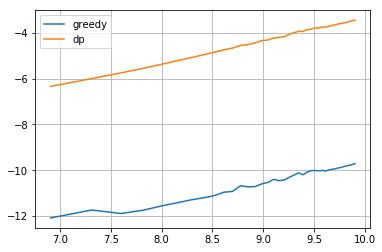

In [34]:
# you don't need to change anything here
# just run the cell
# if your implementations BOTH work

# I want you to look at the plot and explain the output well

coins = [1, 10, 25, 50]
vals = [x for x in range(1000, 20500, 500)]   # varying the value we pass in
greedy_times = []
dp_times = []

n_runs = 20
for val in vals:
    greedy_time = 0
    dp_time = 0
    for i in range(n_runs):
        starttime = time.time()
        coin_counts_greedy = change_greedy(coins, val)
        endtime = time.time()
        greedy_time += endtime-starttime

        starttime = time.time()
        num_coins, ans = change_dp(coins, val)
        endtime = time.time()
        dp_time += endtime-starttime
    greedy_times.append(greedy_time/n_runs)
    dp_times.append(dp_time/n_runs)

plt.plot(np.log(vals), np.log(greedy_times), label='greedy')
plt.plot(np.log(vals), np.log(dp_times), label='dp')
plt.grid()
plt.legend(loc='best')

slope_g, intercept_g = np.polyfit(np.log(vals), np.log(greedy_times), 1)
slope_d, intercept_d = np.polyfit(np.log(vals), np.log(dp_times), 1)

print('Greedy Slope: {}, DP Slope: {}'.format(slope_g, slope_d))

<h3>Modifying number of coins</h3>
<h4>You need to do the analysis in the report and explain what this represents</h4>

In [35]:
# you don't need to change anything here
# just run the cell
# if your implementations BOTH work

with np.errstate(divide='ignore'):
    # varying the coin denominations we are using
    # hopefully this doesn't break anything
    coins = [np.random.choice(np.arange(0, 100), size=x, replace=False) for x in range(0, 102, 2)]
    val = 127  # fixed value
    greedy_times = []
    dp_times = []

    n_runs = 20
    for coin in coins:
        greedy_time = 0
        dp_time = 0
        for i in range(n_runs):
            starttime = time.time()
            coin_counts_greedy = change_greedy(coin, val)
            endtime = time.time()
            greedy_time += endtime-starttime

            starttime = time.time()
            num_coins, ans = change_dp(coin, val)
            endtime = time.time()
            dp_time += endtime-starttime
        greedy_times.append(greedy_time/n_runs)
        dp_times.append(dp_time/n_runs)

    plt.plot(np.log(np.arange(1, len(coins)+1)), np.log(greedy_times), label='greedy')
    plt.plot(np.log(np.arange(1, len(coins)+1)), np.log(dp_times), label='dp')
    plt.grid()
    plt.legend(loc='best')

    slope_g, intercept_g = np.polyfit(np.log(np.arange(1, len(coins)+1)), np.log(greedy_times), 1)
    slope_d, intercept_d = np.polyfit(np.log(np.arange(1, len(coins)+1)), np.log(dp_times), 1)

    print('Greedy Slope: {}, DP Slope: {}'.format(slope_g, slope_d))

IndexError: index -1 is out of bounds for axis 0 with size 0